# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat =city_weather['coord']['lat']
        city_lng =city_weather['coord']['lon']
        city_max_temp=city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds=city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country= city_weather['sys']['country']
        city_date = city_weather['dt']
        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaoma
Processing Record 2 of Set 1 | pedasi
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | pombas
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | camacha
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | chara
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | cockburn town
Processing Record 23 of 

City not found. Skipping...
Processing Record 36 of Set 4 | chapais
Processing Record 37 of Set 4 | atherton
Processing Record 38 of Set 4 | sao raimundo nonato
Processing Record 39 of Set 4 | alugan
Processing Record 40 of Set 4 | takab
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | arona
Processing Record 43 of Set 4 | les escoumins
Processing Record 44 of Set 4 | ust-kuyga
Processing Record 45 of Set 4 | palana
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | juifang
City not found. Skipping...
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | dunmore town
Processing Record 0 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | anaconda
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | espanola
Processing Record 5 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 5 | ondarroa
Processing Record 7 o

Processing Record 27 of Set 8 | suntar
Processing Record 28 of Set 8 | salym
Processing Record 29 of Set 8 | gisborne
Processing Record 30 of Set 8 | lingyuan
Processing Record 31 of Set 8 | araouane
Processing Record 32 of Set 8 | tucumcari
Processing Record 33 of Set 8 | northam
Processing Record 34 of Set 8 | dali
Processing Record 35 of Set 8 | shahrud
Processing Record 36 of Set 8 | sfantu gheorghe
Processing Record 37 of Set 8 | avera
Processing Record 38 of Set 8 | esperance
Processing Record 39 of Set 8 | ahumada
City not found. Skipping...
Processing Record 40 of Set 8 | mayakonda
Processing Record 41 of Set 8 | tunxi
City not found. Skipping...
Processing Record 42 of Set 8 | puerto escondido
Processing Record 43 of Set 8 | tiksi
Processing Record 44 of Set 8 | gusevskiy
Processing Record 45 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 46 of Set 8 | yatou
Processing Record 47 of Set 8 | muroto
Processing Record 48 of Set 8 | wokha
Processing Record 49 of

Processing Record 23 of Set 12 | jarjis
City not found. Skipping...
Processing Record 24 of Set 12 | oistins
Processing Record 25 of Set 12 | leesburg
Processing Record 26 of Set 12 | trairi
Processing Record 27 of Set 12 | half moon bay
Processing Record 28 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 29 of Set 12 | bandar-e anzali
Processing Record 30 of Set 12 | novaya ladoga
Processing Record 31 of Set 12 | mitsamiouli
Processing Record 32 of Set 12 | halalo
City not found. Skipping...
Processing Record 33 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 34 of Set 12 | vostok
Processing Record 35 of Set 12 | otane
Processing Record 36 of Set 12 | novokizhinginsk
Processing Record 37 of Set 12 | tanah merah
Processing Record 38 of Set 12 | talawakele
Processing Record 39 of Set 12 | kaliua
Processing Record 40 of Set 12 | vila franca do campo
Processing Record 41 of Set 12 | tual
Processing Record 42 of Set 12 | concarneau
Processing Record 43

In [113]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
#city_data_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaoma,-14.7833,24.8000,22.73,69,100,4.50,ZM,1678692348
1,pedasi,7.5333,-80.0333,23.84,82,9,1.66,PA,1678692348
2,albany,42.6001,-73.9662,3.29,78,100,0.45,US,1678692348
3,pombas,17.1503,-25.0201,18.88,74,8,4.10,CV,1678692348
4,namibe,-15.1961,12.1522,24.77,75,90,0.59,AO,1678692348
...,...,...,...,...,...,...,...,...,...
583,tabou,4.4230,-7.3528,23.39,87,17,0.96,CI,1678692410
584,bengkulu,-3.8004,102.2655,28.42,73,99,2.88,ID,1678692166
585,hambantota,6.1241,81.1185,31.19,70,40,4.12,LK,1678692410
586,mount gambier,-37.8333,140.7667,17.12,64,100,4.27,AU,1678692410


In [114]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaoma,-14.7833,24.8000,22.73,69,100,4.50,ZM,1678692348
1,pedasi,7.5333,-80.0333,23.84,82,9,1.66,PA,1678692348
2,albany,42.6001,-73.9662,3.29,78,100,0.45,US,1678692348
3,pombas,17.1503,-25.0201,18.88,74,8,4.10,CV,1678692348
4,namibe,-15.1961,12.1522,24.77,75,90,0.59,AO,1678692348


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [115]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaoma,-14.7833,24.8000,22.73,69,100,4.50,ZM,1678692348
1,pedasi,7.5333,-80.0333,23.84,82,9,1.66,PA,1678692348
2,albany,42.6001,-73.9662,3.29,78,100,0.45,US,1678692348
3,pombas,17.1503,-25.0201,18.88,74,8,4.10,CV,1678692348
4,namibe,-15.1961,12.1522,24.77,75,90,0.59,AO,1678692348


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

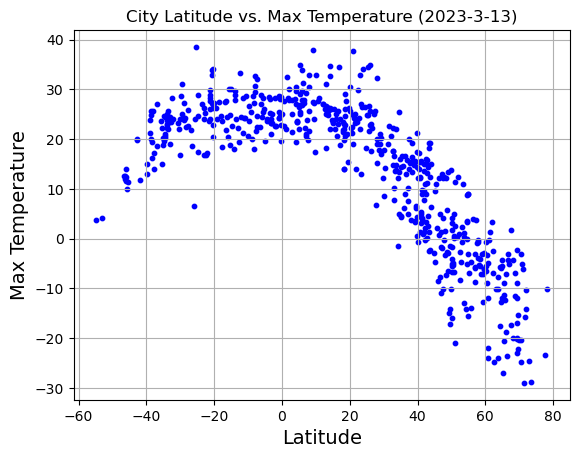

In [30]:
# Build scatter plot for latitude vs. temperature
fig1, ax1 = plt.subplots()
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], s=10, color="blue")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-3-13)')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Max Temperature', fontsize =14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

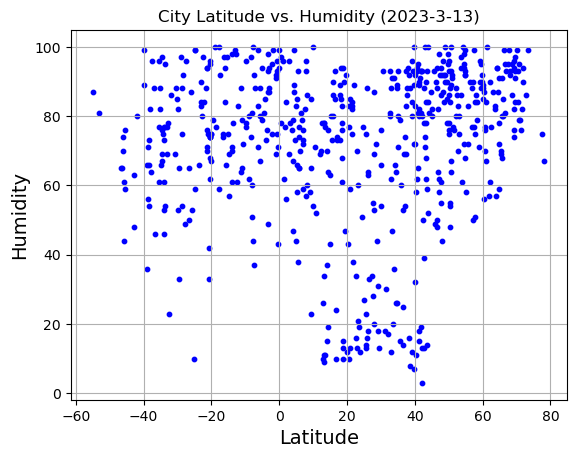

In [36]:
# Build the scatter plots for latitude vs. humidity
fig2, ax1 = plt.subplots()
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], s=10, color="blue")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-3-13)')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Humidity', fontsize =14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

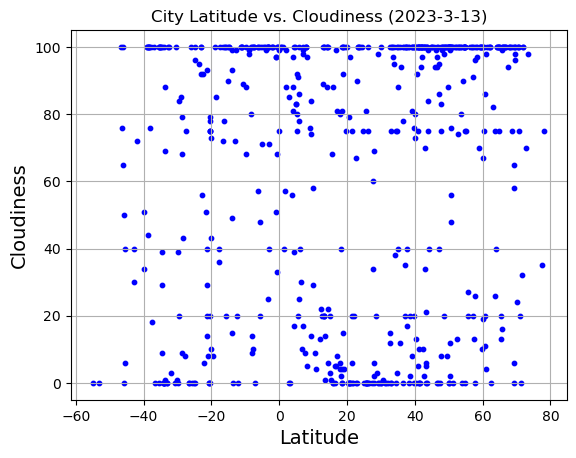

In [37]:
# Build the scatter plots for latitude vs. cloudiness
fig3, ax1 = plt.subplots()
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], s=10, color="blue")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-3-13)')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Cloudiness', fontsize =14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

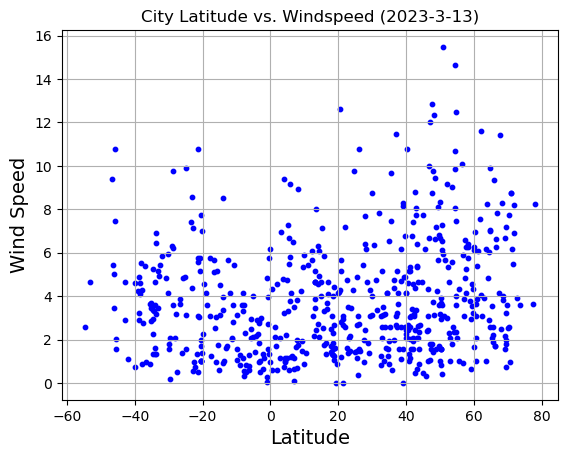

In [38]:
# Build the scatter plots for latitude vs. wind speed
fig4, ax1 = plt.subplots()
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], s=10, color="blue")

# Incorporate the other graph properties
plt.title('City Latitude vs. Windspeed (2023-3-13)')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Wind Speed', fontsize =14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.543


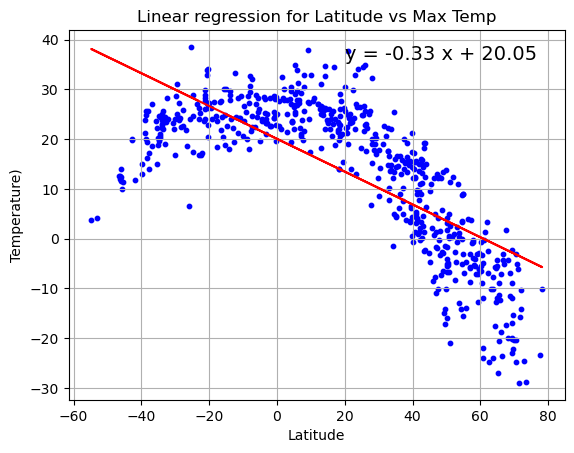

In [121]:
# Define a function to create Linear Regression plots
#Latitude vs Temperature
(slope, intercept,rvalue, pvalue, stderr)= linregress(city_data_df['Lat'],city_data_df['Max Temp'])
regress_values=city_data_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],s=10, color='b')
plt.plot(city_data_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Temperature)")
plt.title("Linear regression for Latitude vs Max Temp")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.006


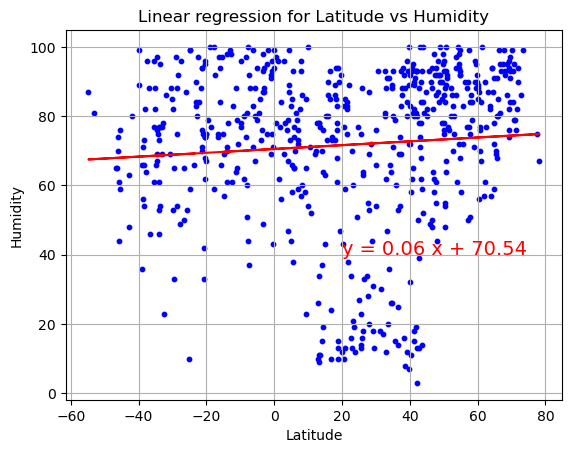

In [124]:
#Latitude vs Humidity
(slope, intercept,rvalue, pvalue, stderr)= linregress(city_data_df['Lat'],city_data_df['Humidity'])
regress_values=city_data_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],s=10, color='b')
plt.plot(city_data_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,40), fontsize=14, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear regression for Latitude vs Humidity")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()



The r-squared is: 0.017


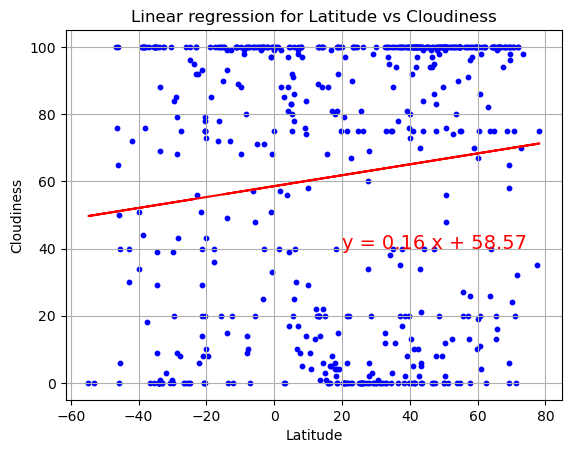

In [125]:
#Latitude vs Cloudness
(slope, intercept,rvalue, pvalue, stderr)= linregress(city_data_df['Lat'],city_data_df['Cloudiness'])
regress_values=city_data_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],s=10, color='b')
plt.plot(city_data_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,40), fontsize=14, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear regression for Latitude vs Cloudiness")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

In [126]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.drop(city_data_df[(city_data_df['Lat'] <0)].index)


# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pedasi,7.5333,-80.0333,23.84,82,9,1.66,PA,1678692348
2,albany,42.6001,-73.9662,3.29,78,100,0.45,US,1678692348
3,pombas,17.1503,-25.0201,18.88,74,8,4.10,CV,1678692348
7,saint george,37.1041,-113.5841,10.14,74,20,3.09,US,1678692349
11,broome,42.2506,-75.8330,2.14,80,100,3.09,US,1678692349


In [127]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.drop(city_data_df[(city_data_df['Lat'] >0)].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kaoma,-14.7833,24.8000,22.73,69,100,4.50,ZM,1678692348
4,namibe,-15.1961,12.1522,24.77,75,90,0.59,AO,1678692348
5,punta arenas,-53.1500,-70.9167,4.06,81,0,4.63,CL,1678692349
6,ushuaia,-54.8000,-68.3000,3.81,87,0,2.57,AR,1678692328
8,rikitea,-23.1203,-134.9692,26.30,84,100,8.57,PF,1678692349


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.79


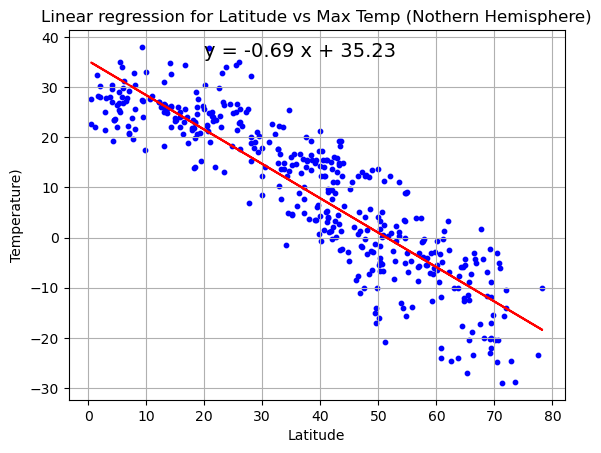

In [128]:
# Linear regression on Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
regress_values=northern_hemi_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],s=10, color='b')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Temperature)")
plt.title("Linear regression for Latitude vs Max Temp (Nothern Hemisphere)")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.263


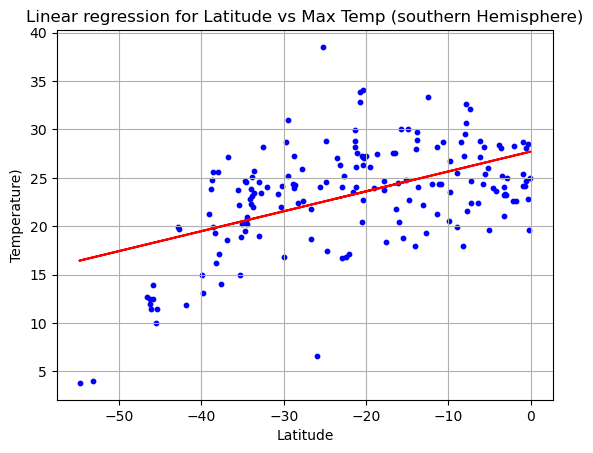

In [129]:
# Linear regression on Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
regress_values=southern_hemi_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],s=10, color='b')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Temperature)")
plt.title("Linear regression for Latitude vs Max Temp (southern Hemisphere)")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

**Discussion about the linear relationship:** The temperature is inversely proportional to latitude for each hemisphere. 
Thus, analysing the data per hemisphere is more ideal in bringing out this relationship. 


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.096


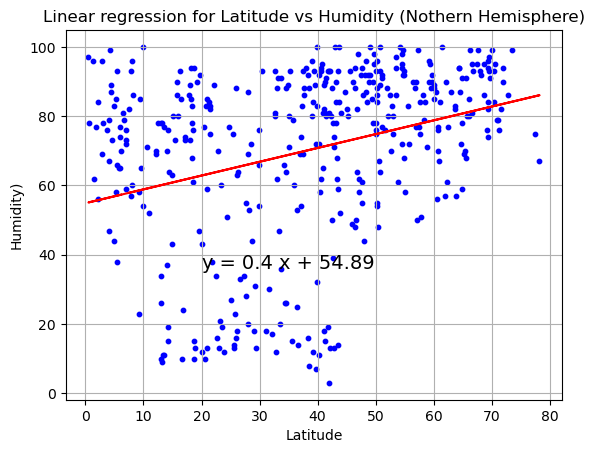

In [130]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
regress_values=northern_hemi_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],s=10, color='b')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity)")
plt.title("Linear regression for Latitude vs Humidity (Nothern Hemisphere)")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.06


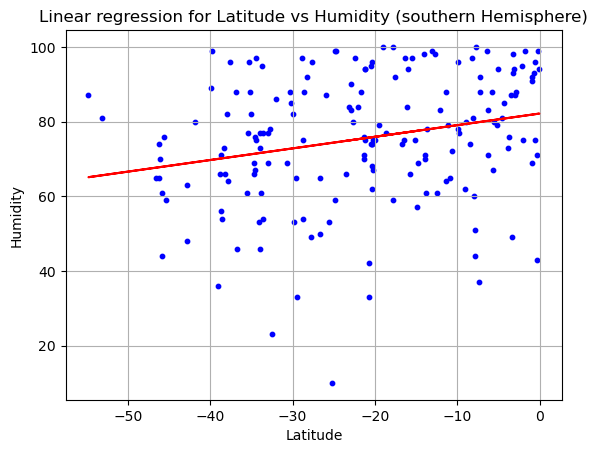

In [131]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
regress_values=southern_hemi_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],s=10, color='b')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear regression for Latitude vs Humidity (southern Hemisphere)")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


**Discussion about the linear relationship:** There is a very slight linear  relationship between Latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.047


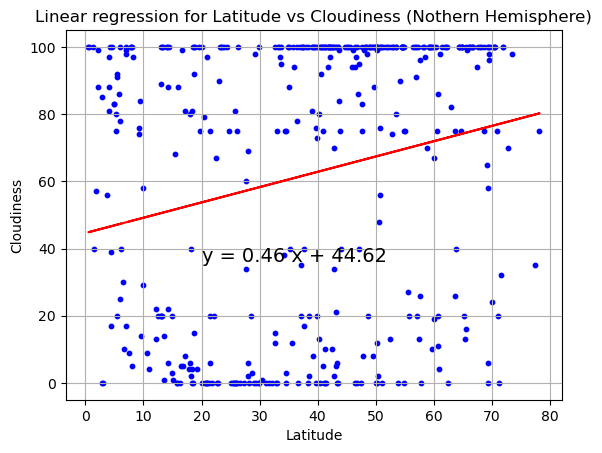

In [132]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
regress_values=northern_hemi_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],s=10, color='b')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear regression for Latitude vs Cloudiness (Nothern Hemisphere)")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.08


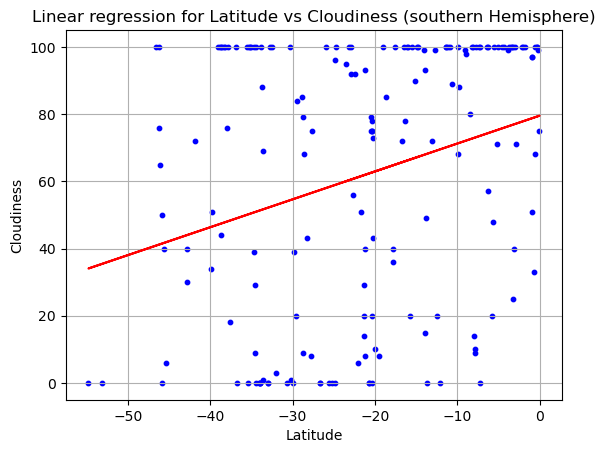

In [133]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
regress_values=southern_hemi_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],s=10, color='b')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear regression for Latitude vs Cloudiness (southern Hemisphere)")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.046


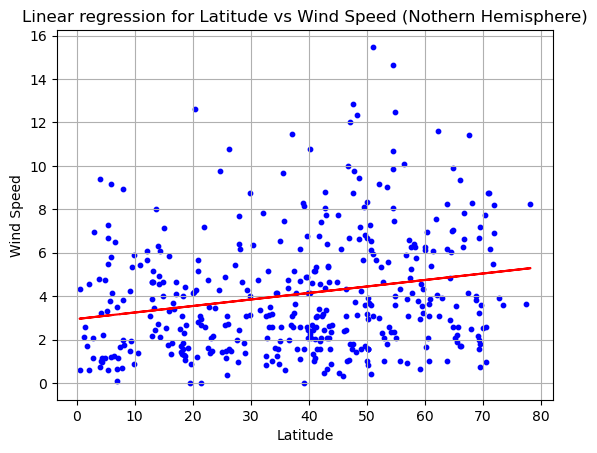

In [136]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
regress_values=northern_hemi_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],s=10, color='b')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear regression for Latitude vs Wind Speed (Nothern Hemisphere)")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.09


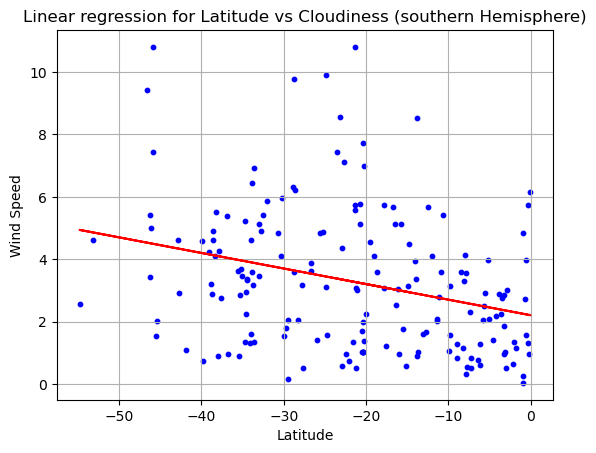

In [137]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
regress_values=southern_hemi_df['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],s=10, color='b')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear regression for Latitude vs Cloudiness (southern Hemisphere)")
plt.grid()
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

**Discussion about the linear relationship:** There is weak linear relationship between Latitude and windspeed, as indicated by r values of less 0.04 and 0.09.  The low wind speeds are concetrated between latitudes 0 to 40. 